# Project - Cat vs Non-cat Classifier

## Description
Dataset is located at `/cxldata/datasets/project/cat-non-cat`

Dataset is in .h5 file. Import h5py to interact with a dataset that is stored in an H5 file. It contains

+ train_catvnoncat.h5 - a training set of 209 images labeled as cat (y=1) or non-cat (y=0)
+ test_catvnoncat.h5 - a test set of 50 images labeled as cat or non-cat
+ Each image is of shape (64, 64, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = 64 pixels) and (width = 64 pixels)

## Guidelines
Build and train a **neural network** to classify the given image as cat or non-cat. **You can either use logistic regression or CNN.**

After you are done, save your notebook as `cat_vs_noncat_classifier.ipynb` inside `cloudxlab_jupyter_notebooks` directory in your home folder on CloudxLab.

In [32]:
# Importing dependencies

import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
%matplotlib inline
import tensorflow as tf

In [33]:
# Function to reset graph and give default seed

def reset_graph(seed=20):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Importing dataset

In [34]:
# Training dataset - composed of 209 images of dimension 64x64 with 3 color channels (RGB)
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', 'r')
train_set_x_orig = np.array(train_dataset['train_set_x'][:])
train_set_y_orig = np.array(train_dataset['train_set_y'][:])

# Test dataset - composed of 50 images of dimension 64x64 with 3 color channels (RGB)
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', 'r')
test_set_x_orig = np.array(test_dataset['test_set_x'][:])
test_set_y_orig = np.array(test_dataset['test_set_y'][:])

# Listing classes - 0 for non-cat and 1 for cat
classes = np.array(test_dataset['list_classes'][:])

# Converting labels to two dimensional array
train_set_y = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
test_set_y = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])

[1]
cat


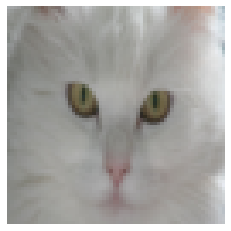

In [57]:
# Visualise a sample image

index = 50 # change this to see a different image
plt.imshow(train_set_x_orig[index])
plt.axis('off')
y = train_set_y[:,index]
y_class = classes[np.squeeze(train_set_y[:, index])].decode('utf-8')
print(y)
print(y_class)

# Defining Convolutional Neural Network

In [52]:
# Defining parameters for training CNN

height = 64
width = 64
channels = 3 
n_inputs = height * width # 4096

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 2

In [53]:
# Defining CNN

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X") # None, 4096
    y = tf.placeholder(tf.int64, shape=[None], name="y") # [None]

conv1 = tf.layers.conv2d(X, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.selu, name="conv1")

# conv1 -> None, 64, 64, 32
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.selu, name="conv2")


# conv2 -> None, 32, 32, 64
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    # pool3 -> None, 16, 16, 64
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 16 * 16]) # old -1, pool3_fmaps * 7 * 7
    #pool3_flat -> None, 64*7*7

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.selu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy, name='loss')
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init"):
    init = tf.global_variables_initializer()

In [56]:
# Running session and showing accuracy

n_epochs = 25

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: train_set_x_orig, y: train_set_y_orig})
        acc_train = accuracy.eval(feed_dict={X: train_set_x_orig, y: train_set_y_orig})
        acc_test = accuracy.eval(feed_dict={X: test_set_x_orig, y: test_set_y_orig})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.34449762 Test accuracy: 0.66
1 Train accuracy: 0.3492823 Test accuracy: 0.66
2 Train accuracy: 0.6555024 Test accuracy: 0.34
3 Train accuracy: 0.6555024 Test accuracy: 0.34
4 Train accuracy: 0.6555024 Test accuracy: 0.34
5 Train accuracy: 0.6555024 Test accuracy: 0.34
6 Train accuracy: 0.6555024 Test accuracy: 0.34
7 Train accuracy: 0.6363636 Test accuracy: 0.44
8 Train accuracy: 0.40669855 Test accuracy: 0.64
9 Train accuracy: 0.38277513 Test accuracy: 0.64
10 Train accuracy: 0.3923445 Test accuracy: 0.66
11 Train accuracy: 0.40669855 Test accuracy: 0.68
12 Train accuracy: 0.5980861 Test accuracy: 0.34
13 Train accuracy: 0.6602871 Test accuracy: 0.36
14 Train accuracy: 0.5980861 Test accuracy: 0.54
15 Train accuracy: 0.71291864 Test accuracy: 0.6
16 Train accuracy: 0.7320574 Test accuracy: 0.48
17 Train accuracy: 0.79425836 Test accuracy: 0.56
18 Train accuracy: 0.7799043 Test accuracy: 0.64
19 Train accuracy: 0.7751196 Test accuracy: 0.66
20 Train accuracy: 0.8277

<div class="alert alert-block alert-info" style="margin-top: 0px">

Project prepared by:

**Dhyey Kotecha**

Email: dhyeygkotecha@gmail.com

(Aug 31, 2020)